# Kaggle Project : 신용카드 사기 거래 탐지

## 1. Describe Your Dataset

**URL:** https://www.kaggle.com/datasets/zeesolver/credit-card

**성능 향상 대상: ** https://github.com/philia00/DGU-MLDL

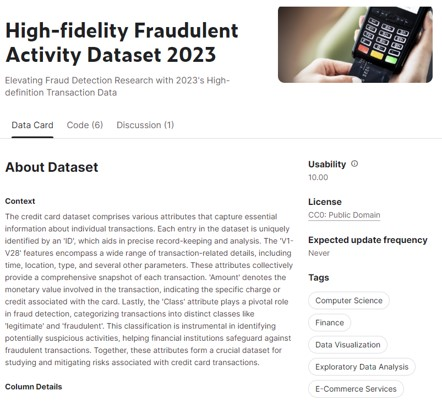

In [1]:
from IPython.display import Image
Image(".\\kaggle.jpg")

**1.1. Task:**

위 Data는 신용카드의 거래 당시 정보(시간, 위치, 거래유형 등)와 거래 금액, 그리고 사기피해 여부를 정리해놓은 것이다. 이를 토대로 다음과 같은 작업을 하고자 한다.


1. 거래 금액(Amount)과 사기 피해의 관계성 탐색 (Classification)

    기존 보고서에는 Logistic Regression, Decision Tree, SVM 등 머신러닝 기법을 통하여 
    거래 금액을 통하여 사기 피해를 탐지하는 관계성을 탐지하였다.
    본 보고서에서는 딥러닝을 통하여, 거래 금액과 사기 피해를 예측해본다.


2. 모든 거래 정보를 통한 사기 피해 탐지(Classification)

    사기 피해 발생을 탐지하기 위한 Input 값으로 거래 금액이라는 단일 변수를 사용하는 것에는
    한계가 있음을 확인하였다. 본 보고서에서는 데이터 셋에서 제공하는 모든 거래 정보를 통하여
    사기 피해를 탐지한다.
    

**1.2. Datasets**

*Data Info*

- ID: 특정 거래에 주어지는 고유 식별 코드.
- V1-V28: 신용 카드 거래와 관련된 기능 또는 속성. (시간, 금액, 위치, 거래 유형, 분석 및 사기 탐지에 사용할 수 있는 다양한 기타 세부 정보)
- 금액: 신용카드 거래에 관련된 금전적 가치. 즉, 해당 거래 중에 카드에 청구되거나 적립된 금액.
- Class: 사기(1), 합법(0)

## 2. 데이터 전처리

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

### 2.1. 데이터 세트 파악

In [3]:
root_data = pd.read_csv('creditcard_2023.csv')
root_data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [4]:
class_0_sample = root_data[root_data['Class'] == 0].sample(n=15, random_state=42)
class_1_sample = root_data[root_data['Class'] == 1].sample(n=15, random_state=42)

# 추출한 데이터를 합쳐서 섞음
random_samples = pd.concat([class_0_sample, class_1_sample]).sample(frac=1, random_state=42)

# 30개를 제외한 나머지 데이터를 추출
remaining_data = root_data.drop(random_samples.index)

# 이후, 성능 확인에 사용할 30개 데이터 CSV 파일로 저장
random_samples.to_csv('performance_data.csv', index=False)

# 학습, 검증, 평가에 사용할 데이터를 CSV 파일로 저장
remaining_data.to_csv('train_data.csv', index=False)

In [5]:
data = pd.read_csv('train_data.csv')
data

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568595,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568596,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568597,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568598,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


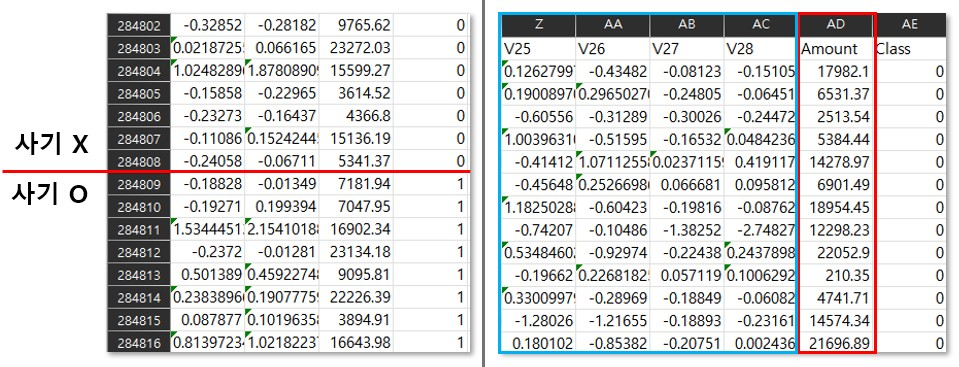

In [6]:
Image(".\\id_amount.jpg")

데이터 셋의 Class가 상단에는 0이, 하단에서는 1이 다수 포함되어 있어
이를 순서대로 나타내는 값인 id는 학습에 방해될 것으로 판단


Amount의 값이 정규화되지 않아, 원본 데이터 셋 그대로 학습 시켰을 경우
손실율이 매우 크게 나왔음. 따라서 정규화 필요

In [7]:
#  학습에 방해되는 값인ID 열 제거 
df = data.drop(['id'], axis=1)

# Amount 추출 및 정규화

Data_A = df[['Amount']]

scaler = StandardScaler()
Data_A = scaler.fit_transform(Data_A)

Data_A = pd.DataFrame(Data_A, columns = ['Amount'])

Data_A

# 정규화한 Data 기입 후 최종 Data 확정
df[['Amount']] = Data_A[['Amount']]
df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.858461,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,-0.796361,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,-1.377005,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,-0.962112,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.323297,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568595,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,-1.105224,1
568596,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,-1.067759,1
568597,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,1.666418,1
568598,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,-0.271844,1


### 2.2. 데이터 세트 분배
가급적 사기와 사기 아님에 해당하는 데이터를 절반씩있는 것이 학습에 유리할 것으로 판단. Train, Validataion, Test 데이터에 넣을 수 있도록 조치하였음.

In [8]:
def split_and_shuffle_data(df, class_column='Class', train_ratio=0.6, validation_ratio=0.25, test_ratio=0.15):
    # 데이터프레임을 클래스별로 분할
    class_0 = df[df[class_column] == 0]
    class_1 = df[df[class_column] == 1]

    # 클래스 0에 대한 행을 분할
    train_class_0 = class_0.sample(frac=train_ratio)
    remaining_class_0 = class_0.drop(train_class_0.index)
    
    validation_class_0 = remaining_class_0.sample(frac=validation_ratio / (1 - train_ratio))
    test_class_0 = remaining_class_0.drop(validation_class_0.index)

    # 클래스 1에 대한 행을 분할
    train_class_1 = class_1.sample(frac=train_ratio)
    remaining_class_1 = class_1.drop(train_class_1.index)

    validation_class_1 = remaining_class_1.sample(frac=validation_ratio / (1 - train_ratio))
    test_class_1 = remaining_class_1.drop(validation_class_1.index)

    # 각 클래스를 합쳐서 최종 train, validation, test 데이터프레임 생성
    train_data = pd.concat([train_class_0, train_class_1]).sample(frac=1).reset_index(drop=True)
    validation_data = pd.concat([validation_class_0, validation_class_1]).sample(frac=1).reset_index(drop=True)
    test_data = pd.concat([test_class_0, test_class_1]).sample(frac=1).reset_index(drop=True)

    return train_data, validation_data, test_data

# 데이터 분할 및 섞기
train_data, validation_data, test_data = split_and_shuffle_data(df)

In [9]:
train_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.225628,-0.055139,1.431221,-0.749378,0.280841,0.241064,0.644680,-0.373245,0.404085,0.920565,...,0.091848,-0.648531,0.137177,0.648596,-0.336720,0.058041,-0.203134,-0.265211,-0.671921,0
1,-0.310701,-0.101841,1.217372,-2.107480,-0.141701,0.326917,0.071270,-0.572809,1.092455,-0.097587,...,-0.629694,0.334721,-0.077580,-0.291169,0.413210,-0.075191,-0.069476,0.127218,-0.994163,0
2,0.678055,0.346260,-0.669948,1.147761,0.157638,-0.758710,-0.174594,-0.046524,-0.829556,-0.490853,...,0.046293,-0.632064,0.024907,-0.449166,0.360051,0.009130,0.718743,0.812723,-0.878360,1
3,0.926292,-0.514834,0.988678,-0.031323,0.143129,1.057568,0.268492,-0.077357,1.414366,0.432487,...,-0.293462,-0.796604,-0.054225,-1.277460,0.816892,-1.126550,-0.133889,-0.046542,1.036095,0
4,-0.052297,0.377991,-0.539123,0.445178,-0.270320,-1.008167,-0.350709,0.136232,0.325947,-0.743084,...,0.057539,-0.370605,0.301187,0.278656,-1.323565,0.728484,0.355784,0.270021,-1.169837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341155,-0.217905,0.057153,-0.620501,1.111737,-0.833860,1.423447,0.746734,-0.542189,-0.785156,-0.373040,...,-0.308963,0.703469,1.480986,-0.387795,-2.159114,0.120349,0.859674,0.328982,-1.308641,1
341156,-2.571780,3.245018,-2.461085,1.273007,-3.191377,-2.845241,-2.416109,5.629649,-1.069936,-1.181217,...,0.572802,-1.824628,-1.300801,0.376036,3.611831,-0.486638,1.560530,0.803067,-0.493198,1
341157,-0.245989,-0.239257,-0.606408,0.390188,-0.411786,0.872560,0.503236,0.031400,-0.297563,-0.511903,...,0.150028,0.095261,0.462338,-0.493716,-2.028772,-0.039676,0.617762,0.658871,0.709821,1
341158,-0.604559,0.159483,0.186062,-0.457393,0.026191,-0.415932,0.274436,0.228987,-0.215623,0.106061,...,-0.070712,-0.309329,-0.213693,0.891592,0.776417,0.798809,-0.773362,-0.925750,-0.444644,0


In [10]:
validation_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.820686,0.914466,-1.006404,1.397661,-1.239158,-0.620437,-1.014007,0.480302,-1.928212,-1.572481,...,0.671824,0.618211,0.004162,0.924154,0.213415,0.581138,2.619468,1.778725,-0.896770,1
1,0.378233,0.326014,-0.772317,0.814169,-0.429431,-0.965666,-0.597948,0.138038,0.115674,-0.782418,...,0.185244,0.025472,0.688638,0.209971,-2.945368,0.715065,0.578369,0.343477,-1.291442,1
2,-0.678557,1.059856,-1.264648,1.763088,-1.110211,-1.353330,-1.463965,0.768286,-1.367404,-1.679279,...,0.691825,0.399509,0.554039,-0.141975,-1.865642,0.934386,1.779022,1.583480,1.317157,1
3,-0.345345,0.161065,-0.133370,0.383598,-0.096295,0.294239,-0.372774,-0.522003,-0.282232,-0.338528,...,-0.209949,1.011172,0.020518,-0.474139,-0.685853,0.321191,0.021982,0.112064,0.503834,1
4,1.708652,-0.606093,0.374417,-0.391900,-0.047881,0.093055,0.235882,-0.158732,1.650443,0.538245,...,-0.028953,0.696930,0.107271,0.139564,-0.278753,-0.495098,-0.194817,-0.191052,-1.217170,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142145,0.688851,0.245671,-0.646845,0.699959,0.272156,-0.287584,-0.044144,0.017416,-0.384404,-0.321349,...,0.046659,0.044145,0.122351,0.592698,-0.639288,-0.478219,0.168784,-0.097390,-1.038005,1
142146,-0.107035,-0.414414,0.530713,-2.107162,0.190162,-0.031251,0.548293,-0.079475,-0.327050,0.509005,...,0.138907,1.281078,-0.322770,-0.528591,0.488457,-0.025618,-0.328668,-0.061792,-0.328264,0
142147,-0.873259,0.475342,-0.611086,0.638651,-0.499917,-0.188648,-0.743552,0.002262,-0.523271,-0.791176,...,0.766159,0.013091,-0.185823,-0.146829,-0.947041,-0.730070,-0.329998,0.454396,-1.685952,1
142148,-0.342911,-0.284790,1.124192,-1.782214,-0.240875,0.637031,0.188871,0.138080,-0.110073,0.612131,...,0.099040,1.200535,-0.191404,-0.503911,0.169604,-0.312539,0.070364,-0.007379,-1.089527,0


In [11]:
test_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.190345,-0.291007,1.909240,-0.188799,0.392621,1.672241,0.345953,0.024019,0.992724,0.577674,...,-0.249561,-0.403567,-0.401758,-2.604326,0.868231,-0.220503,0.403917,0.432584,-1.615664,0
1,-0.386721,0.251261,-0.187789,-1.251556,0.743196,0.646274,0.221722,-0.941693,0.083535,0.246395,...,0.047984,-0.195112,0.234460,-0.488861,-0.891685,0.959632,-0.785386,0.387743,-0.843693,0
2,1.626036,-0.586638,0.328224,-0.475262,0.044822,0.142711,0.323162,-0.179497,1.043482,0.571331,...,-0.184645,-0.551350,0.460575,2.631730,-1.113635,0.380299,-0.289736,-0.152000,1.499834,0
3,-0.291767,-0.558873,-0.268617,0.935411,-0.092169,0.632667,0.827966,-0.202027,0.057805,0.353821,...,-0.144041,-0.067599,0.234567,1.504737,-0.667643,0.155546,-0.029895,-1.868802,0.292353,1
4,-0.292336,-0.968721,1.213727,-1.467426,0.867779,-0.416972,0.377526,-0.222617,-0.045409,0.829768,...,-0.242444,-0.643047,-0.025882,-0.741618,-0.120471,1.808431,-0.673387,0.257505,0.790304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85285,0.162658,0.004363,-0.055365,0.389078,-0.229652,-0.054484,-0.227094,0.052623,-0.265492,-0.229306,...,0.138620,0.238540,-0.151059,0.055011,0.392051,-0.133873,0.463780,0.523754,-0.152502,1
85286,0.960468,-0.219710,0.303315,0.113048,0.416982,0.316419,0.434144,-0.120063,0.309491,0.457577,...,-0.118274,-0.153500,-0.140296,-0.830788,0.785494,-0.122140,-0.200538,0.021550,1.687648,1
85287,1.032250,-0.928667,1.452644,-0.827026,-0.284748,1.045932,-0.068481,-0.001364,1.021055,0.806520,...,-0.034490,0.695312,-0.113218,-0.475559,0.499772,0.000054,-0.138772,-0.086016,-0.958262,0
85288,-0.513326,-0.281169,-0.488474,0.521585,-0.893012,1.107773,0.393011,-0.720380,-0.118648,-0.528923,...,-0.112857,-0.105097,-3.194936,0.778908,-0.981777,-0.529458,1.389011,-0.418829,0.987895,1


In [26]:
def print_class_ratio(data, class_column='Class'):
    class_counts = data[class_column].value_counts(normalize=True)
    print(f"사기 X 데이터 비율: {class_counts.get(0, 0) * 100:.2f}%")
    print(f"사기 O 데이터 비율: {class_counts.get(1, 0) * 100:.2f}%")

# Train 데이터의 Class 비율 출력
print("\n학습 데이터 Class 비율:")
print_class_ratio(train_data)

# Validation 데이터의 Class 비율 출력
print("\n검증 데이터 Class 비율:")
print_class_ratio(validation_data)

# Test 데이터의 Class 비율 출력
print("\n평가 데이터 Class 비율:")
print_class_ratio(test_data)



학습 데이터 Class 비율:
사기 X 데이터 비율: 50.00%
사기 O 데이터 비율: 50.00%

검증 데이터 Class 비율:
사기 X 데이터 비율: 50.00%
사기 O 데이터 비율: 50.00%

평가 데이터 Class 비율:
사기 X 데이터 비율: 50.00%
사기 O 데이터 비율: 50.00%


In [27]:
#Tensor 형태로 변환
reg_Ttensor_x = torch.Tensor(reg_train_x)
reg_Ttensor_y = torch.Tensor(reg_train_y)
reg_Ttensor_y = reg_Ttensor_y.view(-1, 1)
#print("학습 Tensor")
#print(price_Ttensor_x), print(price_Ttensor_y)

reg_Vtensor_x = torch.Tensor(reg_val_x)
reg_Vtensor_y = torch.Tensor(reg_val_y)
reg_Vtensor_y = reg_Vtensor_y.view(-1, 1)
#print("\n검증 Tensor")
#print(price_Vtensor_x), print(price_Vtensor_y)


reg_Tetensor_x = torch.Tensor(reg_test_x)
reg_Tetensor_y = torch.Tensor(reg_test_y)
reg_Tetensor_y = reg_Tetensor_y.view(-1, 1)
#print("\n평가 Tensor")
#print(price_Tetensor_x), print(price_Tetensor_y)

### 2.4. 1번 Task(거래 가격을 통한 사기 탐지)를 위한 데이터 변환

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim

**Features(x):**

Amount: Classification에 사용할 Features
    
**Target(y):**

Class: Classification의 Target

In [29]:
#데이터 세트에서 Amount와 Class에 해당하는 값만을 활용하도록 변환
# Train Data 변환
price_train_x = train_data[['Amount']].values
price_train_y = train_data[['Class']].values
price_train_y = price_train_y.ravel()
print("학습: ", price_train_x.shape, price_train_y.shape)

# validation Data 변환
price_val_x = validation_data[['Amount']].values
price_val_y = validation_data[['Class']].values
price_val_y = price_val_y.ravel()
print("검증: ",price_val_x.shape, price_val_y.shape)

# Test Data 변환
price_test_x = test_data[['Amount']].values
price_test_y = test_data[['Class']].values
price_test_y = price_test_y.ravel()
print("평가: ",price_test_x.shape, price_test_y.shape)

학습:  (341160, 1) (341160,)
검증:  (142150, 1) (142150,)
평가:  (85290, 1) (85290,)


In [30]:
#Tensor 형태로 변환
price_Ttensor_x = torch.Tensor(price_train_x)
price_Ttensor_y = torch.Tensor(price_train_y)
price_Ttensor_y = price_Ttensor_y.view(-1, 1)
#print("학습 Tensor")
#print(price_Ttensor_x), print(price_Ttensor_y)

price_Vtensor_x = torch.Tensor(price_val_x)
price_Vtensor_y = torch.Tensor(price_val_y)
price_Vtensor_y = price_Vtensor_y.view(-1, 1)
#print("\n검증 Tensor")
#print(price_Vtensor_x), print(price_Vtensor_y)


price_Tetensor_x = torch.Tensor(price_test_x)
price_Tetensor_y = torch.Tensor(price_test_y)
price_Tetensor_y = price_Tetensor_y.view(-1, 1)
#print("\n평가 Tensor")
#print(price_Tetensor_x), print(price_Tetensor_y)

### 2.5. 2번 Task(모든 거래 정보를 통한 사기 탐지)를 위한 데이터 변환
**Features(x):**

V1-V28, Amount: Classification에 사용할 Features
    
**Target(y):**

Class: Classification의 Target

In [33]:
# Train Data 변환
train_x = train_data.drop(['Class'], axis=1).values
train_y = train_data[['Class']].values
train_y = train_y.ravel()
print("학습: ",train_x.shape, train_y.shape)

# validation Data 변환
val_x = validation_data.drop(['Class'], axis=1).values
val_y = validation_data[['Class']].values
val_y = val_y.ravel()
print("검증: ",val_x.shape, val_y.shape)

# Test Data 변환
test_x = test_data.drop(['Class'], axis=1).values
test_y = test_data[['Class']].values
test_y = test_y.ravel()
print("평가: ",test_x.shape, test_y.shape)

학습:  (341160, 29) (341160,)
검증:  (142150, 29) (142150,)
평가:  (85290, 29) (85290,)


In [34]:
Ttensor_x = torch.Tensor(train_x)
Ttensor_y = torch.Tensor(train_y)
Ttensor_y = Ttensor_y.view(-1, 1)

Vtensor_x = torch.Tensor(val_x)
Vtensor_y = torch.Tensor(val_y)
Vtensor_y = Vtensor_y.view(-1, 1)

Tetensor_x = torch.Tensor(test_x)
Tetensor_y = torch.Tensor(test_y)
Tetensor_y = Tetensor_y.view(-1, 1)

## 3. 학습

### 3.1. 1번 Task(거래 가격을 통한 사기 탐지) 딥러닝 학습

In [51]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 신경망 모델 정의
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 모델 사용 및 손실함수, 최적화 알고리즘 선정
input_size = price_Ttensor_x.shape[1]  # Use the correct variable name
model = SimpleNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# PyTorch DataLoader 사용
train_dataset = TensorDataset(price_Ttensor_x, price_Ttensor_y)  # Use the correct variable name
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Adjust batch size as needed

val_dataset = TensorDataset(price_Vtensor_x, price_Vtensor_y)  # Use the correct variable name
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)  # Adjust batch size as needed

# 학습 시작
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    # 검증
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_batch_x, val_batch_y in val_loader:
            val_outputs = model(val_batch_x)
            val_loss += criterion(val_outputs, val_batch_y.view(-1, 1)).item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {avg_val_loss:.4f}')

# 평가
model.eval()
with torch.no_grad():
    test_outputs = model(price_Tetensor_x)  # Use the correct variable name
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == price_Tetensor_y.view(-1, 1)).sum().item() / len(price_Tetensor_y)
    print(f'Test Accuracy: {accuracy:.4f}')

# 모델 저장
torch.save(model.state_dict(), 'price_trained_model.pth')  # Use the correct variable name


Epoch [1/10], Loss: 0.2570, Validation Loss: 0.2504
Epoch [2/10], Loss: 0.2477, Validation Loss: 0.2508
Epoch [3/10], Loss: 0.2546, Validation Loss: 0.2503
Epoch [4/10], Loss: 0.2592, Validation Loss: 0.2513
Epoch [5/10], Loss: 0.2433, Validation Loss: 0.2508
Epoch [6/10], Loss: 0.2567, Validation Loss: 0.2505
Epoch [7/10], Loss: 0.2523, Validation Loss: 0.2503
Epoch [8/10], Loss: 0.2497, Validation Loss: 0.2506
Epoch [9/10], Loss: 0.2480, Validation Loss: 0.2506
Epoch [10/10], Loss: 0.2493, Validation Loss: 0.2506
Test Accuracy: 0.4984


In [52]:
#성능 확인용 CSV 읽기
new_data = pd.read_csv('performance_data.csv')

# ID 제거
new_df = new_data.drop(['id'], axis=1)

# 거래 가격 정규화
new_amount = new_df[['Amount']]
new_amount = scaler.transform(new_amount)
new_df[['Amount']] = pd.DataFrame(new_amount, columns=['Amount'])

new_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.615116,0.278088,-0.713233,0.870654,-0.277806,-0.180060,-0.510613,0.079147,-0.085981,-0.587485,...,0.146293,0.132375,0.457938,-0.600186,-0.747265,-0.158695,-0.891244,1.331690,-0.323755,1
1,-0.749326,0.790724,-0.574146,1.063873,-0.811144,-0.236324,-0.921159,0.579659,-1.493119,-0.969579,...,0.528818,0.850629,-0.175141,0.057434,0.041065,0.892222,0.603986,1.109641,0.954312,1
2,0.956557,0.381527,-0.516825,0.878964,1.891220,-0.787422,1.197384,-0.246413,-0.640243,-0.049136,...,-0.167609,-0.432743,-0.533446,-1.017168,2.172070,1.146174,-0.224390,0.286674,0.677545,1
3,1.135710,-0.074952,-0.110145,0.525634,0.979752,0.941766,0.421664,-0.321459,0.090544,0.755986,...,0.231739,-0.014442,-0.057283,-0.802914,0.493482,0.281437,-0.241123,-0.142064,1.104721,1
4,-0.221100,-0.887407,1.171706,-0.724992,0.348944,-0.139536,0.556624,-0.134280,0.843594,0.248565,...,-0.067301,-0.469135,0.705977,-0.210752,-0.205276,-1.540252,-0.338956,-0.028956,0.826873,0
5,1.029609,-0.540382,0.862616,-1.033141,0.084305,0.583564,0.224954,-0.147755,2.987043,0.086455,...,-0.173267,0.012246,-0.143776,-1.314023,0.824834,-1.642502,-0.137407,-0.049988,0.662691,0
6,-2.055617,2.364578,-2.033853,1.178478,-2.415788,-2.317786,-1.931270,3.471896,-1.212619,-1.352712,...,0.549297,-1.127546,-0.480052,0.230027,2.192320,-0.509217,2.130705,1.062042,-0.883756,1
7,-0.730806,1.040219,-1.137695,1.845504,-1.109461,-1.500784,-1.412998,0.652218,-1.639308,-1.662297,...,0.728405,0.497487,0.241534,0.896132,-0.877605,0.652867,2.049807,1.812639,-1.630615,1
8,1.077419,-0.881003,0.371175,-1.502308,-0.041387,0.303183,0.266194,-0.175119,-0.638459,1.440069,...,-0.263356,-0.906530,0.023501,-0.597306,0.323818,-1.043420,-0.240398,-0.063503,1.142517,0
9,1.088324,-0.252963,0.218284,-0.322955,0.377930,-0.210255,0.576307,-0.216568,0.417078,0.371406,...,-0.172196,-0.426297,-0.165525,-0.332368,0.990322,0.868178,-0.276702,-0.023494,0.794634,0


In [54]:
# 성능 평가용 CSV로 부터 인풋 값 읽어오기
new_amount_tensor = torch.Tensor(new_df[['Amount']].values)

# 모델을 통해 예측 시작
model = SimpleNN(input_size)  # Initialize the model with the same input size as before
model.load_state_dict(torch.load('price_trained_model.pth'))
model.eval()

with torch.no_grad():
    predictions = model(new_amount_tensor)

# 예측값 Class 라벨링으로 변경
predicted_labels = (predictions >= 0.5).float().numpy()

# 예측값 데이터 프레임에 추가 및 출력
new_df['Predicted_Class'] = predicted_labels
result_df = new_df[['Amount', 'Class', 'Predicted_Class']]
print(result_df)


      Amount  Class  Predicted_Class
0  -0.323755      1              1.0
1   0.954312      1              0.0
2   0.677545      1              0.0
3   1.104721      1              0.0
4   0.826873      0              0.0
5   0.662691      0              0.0
6  -0.883756      1              1.0
7  -1.630615      1              1.0
8   1.142517      0              0.0
9   0.794634      0              0.0
10 -0.390573      0              1.0
11  0.319279      1              0.0
12  1.507359      0              0.0
13  1.355904      0              0.0
14  1.514465      0              0.0
15 -0.657157      1              1.0
16 -1.667284      0              1.0
17 -0.573217      0              1.0
18  0.328576      1              0.0
19  0.389011      0              0.0
20  0.055881      1              0.0
21  0.762528      1              0.0
22 -0.917281      1              1.0
23  1.593508      1              0.0
24 -1.637238      1              1.0
25  1.166068      0              0.0
2

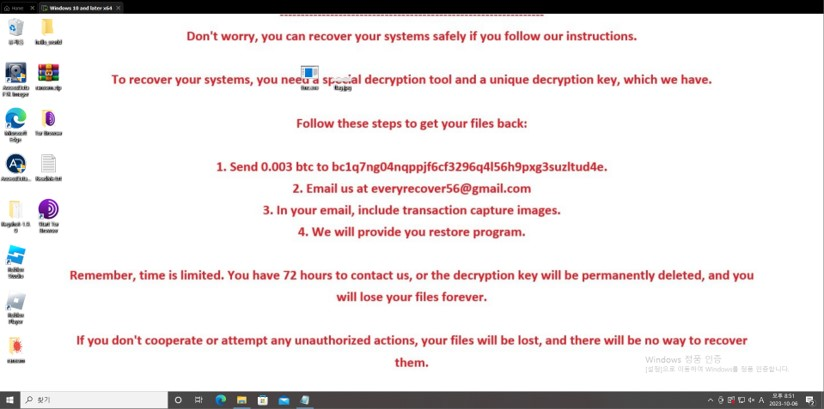

In [43]:
Image(".\\ransom.jpg")

랜섬웨어와 같이 특정 암호화폐 금액을 다수에게 요구하지 않는 이상, 

금액을 통한 사기 측정은 어려울 것으로 보임

### 3.2. 2번 Task(모든 거래 정보를 통한 사기 탐지) 학습

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# 신경망 구축
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# 모델 초기화 및 손실함수, 최적화 알고리즘 선정
input_size = train_x.shape[1]
model = SimpleNN(input_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Dataloader로 학습에 사용할 데이터 가져오기
train_dataset = TensorDataset(Ttensor_x, Ttensor_y)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

val_dataset = TensorDataset(Vtensor_x, Vtensor_y)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

# 학습
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y.view(-1, 1))
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for val_batch_x, val_batch_y in val_loader:
            val_outputs = model(val_batch_x)
            val_loss += criterion(val_outputs, val_batch_y.view(-1, 1)).item()

    avg_val_loss = val_loss / len(val_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {avg_val_loss:.4f}')

# 평가
model.eval()
with torch.no_grad():
    test_outputs = model(Tetensor_x)
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == Tetensor_y.view(-1, 1)).sum().item() / len(Tetensor_y)
    print(f'Test Accuracy: {accuracy:.4f}')

# 모델 저장
torch.save(model.state_dict(), 'trained_model.pth')


Epoch [1/10], Loss: 0.0040, Validation Loss: 0.0072
Epoch [2/10], Loss: 0.0019, Validation Loss: 0.0028
Epoch [3/10], Loss: 0.0003, Validation Loss: 0.0017
Epoch [4/10], Loss: 0.0000, Validation Loss: 0.0014
Epoch [5/10], Loss: 0.0000, Validation Loss: 0.0009
Epoch [6/10], Loss: 0.0003, Validation Loss: 0.0010
Epoch [7/10], Loss: 0.0012, Validation Loss: 0.0009
Epoch [8/10], Loss: 0.0000, Validation Loss: 0.0008
Epoch [9/10], Loss: 0.0000, Validation Loss: 0.0006
Epoch [10/10], Loss: 0.0004, Validation Loss: 0.0010
Test Accuracy: 0.9990


In [49]:
# 성능 확인 데이터 읽기
new_data = pd.read_csv('performance_data.csv')

# id 제거
new_df = new_data.drop(['id'], axis=1)

# amount 정규화
new_amount = new_df[['Amount']]
new_amount = scaler.transform(new_amount)
new_df[['Amount']] = pd.DataFrame(new_amount, columns=['Amount'])

# 텐서 변환
new_tensor_x = torch.Tensor(new_df.drop(['Class'],axis=1).values)

# 모델 적용
model.eval()
with torch.no_grad():
    new_outputs = model(new_tensor_x)
    predicted_labels_new = (new_outputs >= 0.5).float()

# 적용 결과 시각화
classification_results = pd.DataFrame({
    'ID': new_data['id'],
    '예측값': predicted_labels_new.numpy().flatten(),
    '정답': new_df['Class']
})
classification_results


,ID,예측값,정답
0,420806,1.0,1
1,422079,1.0,1
2,442678,1.0,1
3,357548,1.0,1
4,158719,0.0,0
5,10980,0.0,0
6,360829,1.0,1
7,295247,1.0,1
8,136754,0.0,0
9,138028,0.0,0


#### 3.2.2. 머신러닝 이용 학습

In [27]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(fit_intercept=True, 
                              solver='lbfgs', 
                              random_state=0)

In [28]:
from sklearn.tree import DecisionTreeClassifier #regression에서 Classifier로 바꿈
model_dt = DecisionTreeClassifier(criterion='gini',
                                  splitter='best',
                                  max_depth=10,
                                  random_state=0)

In [29]:
models = [model_lr, model_dt]

In [30]:
def accuracy(pre, y):    
    return sum(pre==y)/len(y)

In [31]:
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    
    acc = accuracy(pre, train_y)
    
    print(model, acc)

LogisticRegression(random_state=0) 0.9649236974632265
DecisionTreeClassifier(max_depth=10, random_state=0) 0.9861846386548709


In [33]:
for model in models:   
    #model.fit(val_x, val_y)
    pre = model.predict(val_x)
    
    acc = accuracy(pre, val_y)
    
    print(model, acc)

LogisticRegression(random_state=0) 0.9646972745564295
DecisionTreeClassifier(max_depth=10, random_state=0) 0.9869426348299588


In [34]:
for model in models:  
    #model.fit(val_x, val_y)
    pre = model.predict(test_x)
    
    acc = accuracy(pre, test_y)
    
    print(model, acc)

LogisticRegression(random_state=0) 0.9649883919986868
DecisionTreeClassifier(max_depth=10, random_state=0) 0.9837956991768871


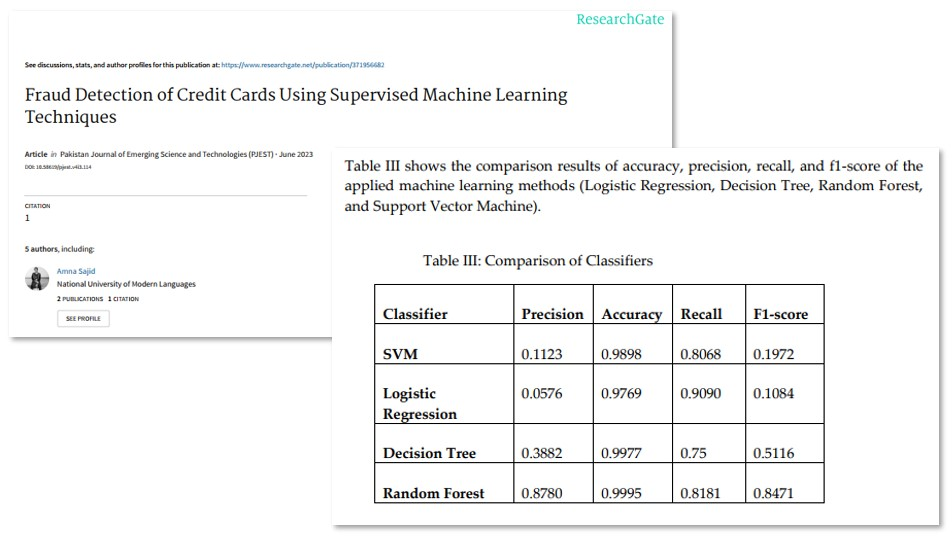

In [46]:
Image(".\\research.jpg")

거래 정보 중 가격을 포함해 타 정보를 모두 활용했을 때, 사기 거래 탐지율이 크게 개선되는 것을 알 수 있었음.